In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from datetime import datetime as dt
from pynse import *
import sympy
from scipy import stats
import talib as tb
import plotly.graph_objects as go
import plotly.express as px

In [59]:
df = pd.read_csv("NIFTY_DATA.csv", parse_dates= ["date"])
df["date"] = df["date"].apply(lambda x: x.date())
df.sort_index(ascending= False, inplace= True)

df["21_dma"]=df["close"].rolling(21).mean()
df["50_dma"]=df["close"].rolling(50).mean()
df = df.loc[df["date"] > dt.date(2020,1,1)]
df.reset_index(drop = True, inplace = True,)

In [6]:
df

,date,open,high,low,close,21_dma,50_dma
562,2020-01-02,12198.55,12289.90,12195.25,12282.20,12116.990476,11993.761
561,2020-01-03,12261.10,12265.60,12191.35,12226.65,12125.726190,12006.212
560,2020-01-06,12170.60,12179.10,11974.20,11993.05,12124.519048,12014.421
559,2020-01-07,12079.10,12152.15,12005.35,12052.95,12130.778571,12023.802
558,2020-01-08,11939.10,12044.95,11929.60,12025.35,12134.961905,12031.765
...,...,...,...,...,...,...,...
4,2022-03-30,17468.15,17522.50,17387.20,17498.25,16832.728571,17138.498
3,2022-03-31,17519.20,17559.80,17435.20,17464.75,16864.673810,17121.631
2,2022-04-01,17436.90,17703.70,17422.70,17670.45,16915.364286,17112.779
1,2022-04-04,17809.10,18114.65,17791.40,18053.40,16989.428571,17115.079


In [20]:
fig = px.line(df,x= 'date',y =['close','21_dma','50_dma'], labels= {"value": "Price","date":"Date"},title= "NIFTY Daily")

fig

### Adding some bunch of acessories to index without which looks incomplete

#### Data Normalization

As the proverb say "Pre-data analysis is as important as brushing teeth regularly" therfore normalizing the data aids the model and reduces the hard time. which improves our accuracy multiple folds by ensuring that different features take on value in similar ranges. 

#### Let's Normalize our daily index data to single normalized vector

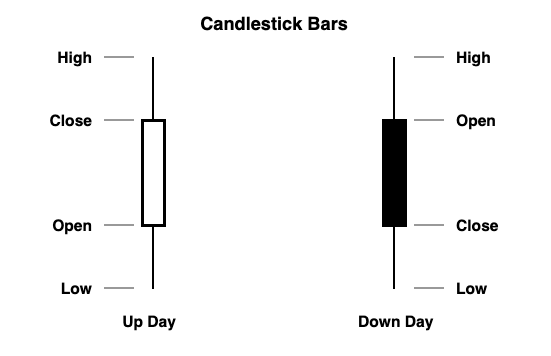

###### Given Above details we define 

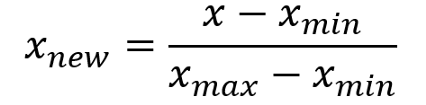

On adding this feature to dataframe we will get a frame like

In [100]:
df["n_close"]= (df["close"] - df["low"]) / (df["high"] - df["low"])
# df["n_close"].max()

fig1 = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['close'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
fig1.add_trace(go.Scatter(x= df.date, y = df["21_dma"],
                          name = '21 D Moving Average',
                          line = dict(color = 'blue')))
fig1.add_trace(go.Scatter(x= df.date, y = df["50_dma"],
                          name = '50 D Moving Average',
                          line = dict(color = 'black')))

In [95]:
fig1.show()

In [98]:
fig_2 = px.imshow(df.corr())

In [99]:
fig_2.show()

##### Please Stop!!

In [4]:
import quandl
import datetime as dt
import numpy as np
import pandas as pd

In [5]:
from local_settings import quandl as settings

ModuleNotFoundError: No module named 'local_settings'

In [6]:
import yfinance as yf

In [31]:
yf.download("JPYUSD=X").to_csv("YEN_.csv")

[*********************100%***********************]  1 of 1 completed


In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'CORN_.csv',
 'CRUDEOIL_.csv',
 'DXY_.csv',
 'EURO_.csv',
 'NATURALGAS_.csv',
 'SOYBEANS_.csv',
 'SPX_.csv',
 'Untitled18.ipynb',
 'WHEAT_.csv',
 'YEN_.csv']